In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit
plt.style.use("bmh")

In [2]:
def cargar_datos(file_name : str) -> list:

    # Cargamos los datos
    with open(file_name, "rb") as f:
        dic = pickle.load(f)
    # Hago una lista con los valores de frecuencia que alimentamos con el generador de funciones
    freq_values_keys = list(dic.keys())
    # Le sacamos la "Hz" a las keys
    freq_values = [float(freq[:-2]) for freq in freq_values_keys]
    t1, V1 = [dic[f'{freq}Hz']['t_1'] for freq in freq_values], [dic[f'{freq}Hz']['V_1'] for freq in freq_values]
    t2, V2 = [dic[f'{freq}Hz']['t_2'] for freq in freq_values], [dic[f'{freq}Hz']['V_2'] for freq in freq_values]
    amp1 = [np.max(v1)-np.min(v1) for v1 in V1] # para ver los datos sobre la hora, hay que calcular bien esto
    amp2 = [np.max(v2)-np.min(v2) for v2 in V2] # para ver los datos sobre la hora, hay que calcular bien esto

    # Creamos una lista para guardar todos los datos que nos interesan
    lista_mediciones = [freq_values, t1, V1, t2, V2, amp1, amp2]

    return lista_mediciones

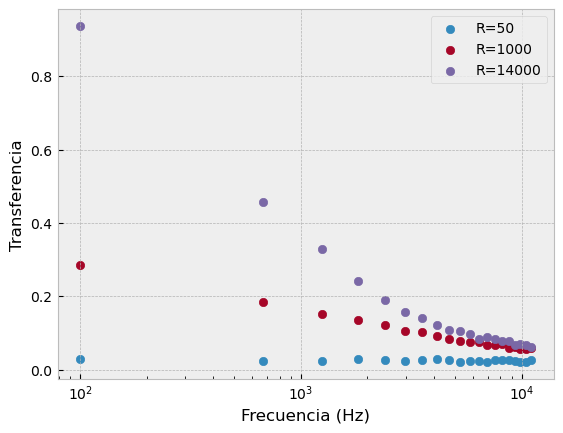

In [3]:
R = [50, 1000, 14000]
freqs = []
Ts = []

plt.figure()
for i,r in enumerate(R):
    file_name = f"../mediciones/Transferencia fotodiodo/Barrido sinusoidal a 1 V de amp y -2 V de offset con R={r} ohm.pickle"
    f, t1, V1, t2, V2, amp1, amp2 = cargar_datos(file_name)
    T = np.array(amp1)/np.array(amp2)
    freqs.append(f)
    Ts.append(T)
    plt.scatter(freqs[i], Ts[i], label=f'R={r}')

plt.ylabel('Transferencia') 
plt.xlabel('Frecuencia (Hz)')
# plt.title(f'R={R}')
plt.xscale("log")
plt.legend()
plt.show()